## Face recognition

### Library

    pip install opencv-python
    pip install cmake
    pip install dlib

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

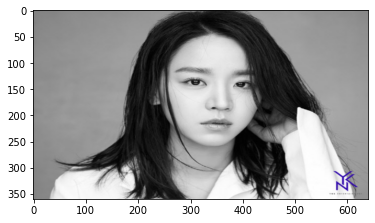

In [2]:
import os
img_path = '/home/aiffel0049/aiffel/Exploration/10.camera_app/images/image.jpg'
img_bgr = cv2.imread(img_path) # opencv로 image 읽기
img_bgr = cv2.resize(img_bgr, (640, 360)) # 640x360 크기로 resize
img_show = img_bgr.copy()  # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

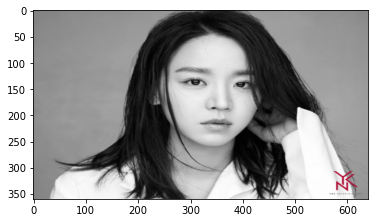

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

- OpenCV doc   
https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

## face landmark

In [4]:
import dlib
detecor_hog = dlib.get_frontal_face_detector()  # detector 선언

In [5]:
# bounding box 추출
# img pyramid : upsampling으로 이미지 크기를 키우는 것
# https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html
dlib_rects = detecor_hog(img_rgb, 1)  # (image, num of img pyramid)

rectangles[[(262, 77) (448, 263)]]


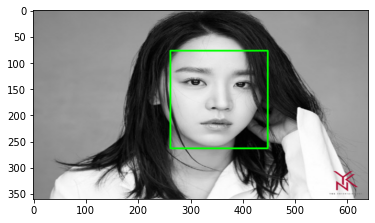

In [6]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- dlib detector : dlib.rectangles 객체 반환
- dlib.rectangles : dlib.rectangle 객체의 배열 형태로 이뤄짐
- dlib.rectangle 객체
    - left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함함
- http://dlib.net/python/index.html#dlib.rectangles

## face landmark

In [7]:
model_path = '/home/aiffel0049/aiffel/Exploration/10.camera_app/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list(list_landmarks[0])))

68


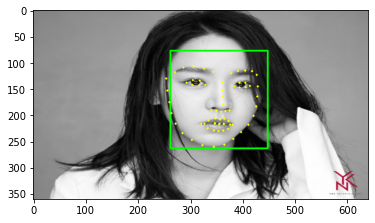

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)  # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])  # nose center index : 30
    x=landmark[30][0]
    y=landmark[30][1] - dlib_rect.width() // 2
    w=dlib_rect.width()
    h=dlib_rect.height()
    print('(x, y) : (%d, %d)'%(x,y))
    print('(w, h) : (%d, %d)'%(w,h))
    

(363, 179)
(x, y) : (363, 86)
(w, h) : (187, 187)


In [11]:
sticker_path = '/home/aiffel0049/aiffel/Exploration/10.camera_app/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(187, 187, 3)


In [12]:
refined_x = x - w // 2  # left
refined_y = y - h  # top
print('(x,y) : (%d, %d)'%(refined_x, refined_y))

(x,y) : (270, -101)


In [13]:
img_sticker = img_sticker[-refined_y:]
print(img_sticker.shape)

(86, 187, 3)


In [14]:
refined_y = 0
print('(x,y) : (%d, %d)'%(refined_x, refined_y))

(x,y) : (270, 0)


### 원본 이미지에 스티커 적용

In [15]:
sticker_area = img_show[refined_y: img_sticker.shape[0], refined_x: refined_x+img_sticker.shape[1]]
img_show[refined_y: img_sticker.shape[0], refined_x: refined_x+img_sticker.shape[1]]= \
         np.where(img_sticker==0, sticker_area, img_sticker).astype(np.uint8)

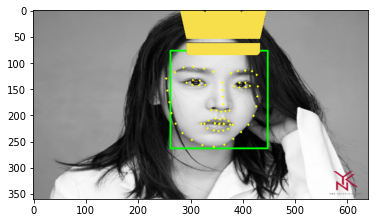

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

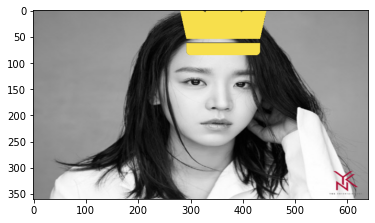

In [17]:
sticker_area = img_bgr[refined_y: img_sticker.shape[0], refined_x: refined_x + img_sticker.shape[1]]
img_bgr[refined_y: img_sticker.shape[0], refined_x: refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()